# EDA Case Study

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the numpy,pandas,matplot,seaborn and datetime modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 
import re
%matplotlib inline

In [3]:
# Read the given Loan Data for consumer finance company from loan.csv file
# into a data frame loan_df
# It is expected that the file with data is kept in the same folder
# as this ipynb file.
loan_csv = pd.read_csv("./Data Set/loan.csv")


In [4]:
loan_df = loan_csv
print("Shape :- ",loan_df.shape,'\n')
print("Summary:- ")
print(loan_df.info())

Shape :-  (39717, 111) 

Summary:- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


## Data Cleaning

In [5]:
# Fix Rows : - 
#  Delete Incorrect values 
#  Delete Summary Rows
#  Delete Extra Rows
# Ans -> We donot have any headers, footers, summarizing rows, totalling rows.

In [6]:
#  Fix missing values
# Code for column-wise null count. The isnull() function finds the rows ( axis =0 ) as null for columns and sum() 
# function sums up row values for each column 
print(loan_df.isnull().sum(axis=0))

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [7]:
# Code for calculating column-wise null percentages. 
# The percentage of null columns = 100 *( no of null columns)/(no of total columns)
# round function is used to round-off the percentage. Here, 2 stands for the precision digits for round-off
print(round(100*(loan_df.isnull().sum()/len(loan_df.index)), 2))

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.58
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

In [8]:
# Drop all columns that have all null values
loan_df.dropna(axis=1,how='all',inplace=True)

# Drop all rows that have all null values
loan_df.dropna(axis=0,how='all',inplace=True)

print("\n Shape after removing rows and columns with all null-values :- ", loan_df.shape)

print("Percentage of remaining null values :- \n:- ")
print(round(100*(loan_df.isnull().sum()/len(loan_df.index)), 2))


 Shape after removing rows and columns with all null-values :-  (39717, 57)
Percentage of remaining null values :- 
:- 
id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti            

In [9]:
# Remove columns with only one unique values. This is because if there is no variation
# in values it will show no patterns for analysis
loan_df= loan_df.loc[:,loan_df.nunique()!=1]

print("\n Shape after removing rows and columns with all null-values :- ", loan_df.shape)

print("Percentage of remaining null values :- \n:- ")
print(round(100*(loan_df.isnull().sum()/len(loan_df.index)), 2))

loan_df.columns


 Shape after removing rows and columns with all null-values :-  (39717, 48)
Percentage of remaining null values :- 
:- 
id                          0.00
member_id                   0.00
loan_amnt                   0.00
funded_amnt                 0.00
funded_amnt_inv             0.00
term                        0.00
int_rate                    0.00
installment                 0.00
grade                       0.00
sub_grade                   0.00
emp_title                   6.19
emp_length                  2.71
home_ownership              0.00
annual_inc                  0.00
verification_status         0.00
issue_d                     0.00
loan_status                 0.00
url                         0.00
desc                       32.58
purpose                     0.00
title                       0.03
zip_code                    0.00
addr_state                  0.00
dti                         0.00
delinq_2yrs                 0.00
earliest_cr_line            0.00
inq_last_6mths       

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

In [10]:
# Now for analysis we need only charged off loans (that were defaulted) and Full - paid 
# loans (that were paid off). We cannot derive much from Loans that have status "Current"
# as given in the problem description. The charged of loans will give us patterns that 
# will help us analyse what resulted in default. And the Full Paid Off will help us 
# negate the characteristics that are common in both type of loans i.e. help to identify 
# specific characteristics about charged off loans not present in Fully - Paid Loans
loan_df = loan_df.loc[loan_df['loan_status']!="Current"]

print(round(100*(loan_df.isnull().sum()/len(loan_df.index)), 2))


id                           0.00
member_id                    0.00
loan_amnt                    0.00
funded_amnt                  0.00
funded_amnt_inv              0.00
term                         0.00
int_rate                     0.00
installment                  0.00
grade                        0.00
sub_grade                    0.00
emp_title                    6.19
emp_length                   2.68
home_ownership               0.00
annual_inc                   0.00
verification_status          0.00
issue_d                      0.00
loan_status                  0.00
url                          0.00
desc                        32.47
purpose                      0.00
title                        0.03
zip_code                     0.00
addr_state                   0.00
dti                          0.00
delinq_2yrs                  0.00
earliest_cr_line             0.00
inq_last_6mths               0.00
mths_since_last_delinq      64.56
mths_since_last_record      92.90
open_acc      

In [11]:
# Looking at the significance of all columns where number of nulls > 5 %
# i.e. desc','mths_since_last_delinq','mths_since_last_record','next_pymnt_d','emp_title'

# desc -> loan description provided by the borrower. We can surely do some textual 
# analysis techniques to derive new features like sentiment - find words that are provided 
# commonly by defaulters etc, but its out of the purview of our current analysis

# mths_since_last_delinq -> The number of months since the borrower's last delinquency.
# A loan becomes delinquent when you make payments late (even by one day) or miss a 
# regular installment payment or payments. Null value of this column signifies that you
# have never defaulted before. And a month-yr value signiifes that how many months before 
# did you last defaulted in your payment. Notice you have not been charged off yet or 
# officially marked a defaulter. This particular piece of information is pulled from the 
# borrower's credit report and hence it seems to be a valid column to be preserved.But since 
# we have a lot of null values, so we will drop this column

# mths_since_last_record -> The number of months since the last public record.
# Public records that can appear on your credit report include bankruptcy, judgment,
# or a tax lien. In some states, foreclosure and repossession are also public records.
# These entries are picked from credit reports and are one of the worst types of entries
# to appear on your credit report because they show a serious delinquency. This is a valid
# column to be preserved. But since we have a lot of null values, so we will drop this column

# next_pymnt_d->Next scheduled payment date
# Since we have taken loan info that  has either charged-off or Fully paid loans this 
# column has all nulls and can be deleted

# emp_tite ->The job title supplied by the Borrower when applying for the loan.
# Firstly, this is something the borrower has provided and not we certainly know. Secondly,
# it will make sense only if we could do some textual analysis that it would make sense
# which is out of the purview of the analysis. Hence, we can drop this column.

loan_df = loan_df.drop(['desc','mths_since_last_delinq','mths_since_last_record','next_pymnt_d','emp_title'], axis = 1)


# Let's at first make the mising employee length at 0 years these are just 2.68 %
loan_df['emp_length'].fillna(value="0 years",inplace=True)

# Revolving line utilization rate, or the amount of credit the borrower is using relative
# to all available revolving credit. Revolving utilization, also known as your 
# “debt-to-limit ratio” or “credit utilization”. It is calculated by the formula 
#  (Balance of Credit / Credit Limit) * 100  = Revolving Utilization Rate
# Revolving utilization is an important consideration in your credit scores for one
# very simple and important reason: it is statistically predictive of higher credit risk. 
# When you carry outstanding credit card debt on your credit reports you represent a 
# higher credit risk than someone whose reports show paid off credit card balances. 
# Since we have % of nulls for revol_util, let's ampute it with 0 .The missing entries 
# are where people didnt have credit card etc.
loan_df['revol_util'].fillna(value="0%",inplace=True)

print(round(100*(loan_df.isnull().sum()/len(loan_df.index)), 2))


id                         0.00
member_id                  0.00
loan_amnt                  0.00
funded_amnt                0.00
funded_amnt_inv            0.00
term                       0.00
int_rate                   0.00
installment                0.00
grade                      0.00
sub_grade                  0.00
emp_length                 0.00
home_ownership             0.00
annual_inc                 0.00
verification_status        0.00
issue_d                    0.00
loan_status                0.00
url                        0.00
purpose                    0.00
title                      0.03
zip_code                   0.00
addr_state                 0.00
dti                        0.00
delinq_2yrs                0.00
earliest_cr_line           0.00
inq_last_6mths             0.00
open_acc                   0.00
pub_rec                    0.00
revol_bal                  0.00
revol_util                 0.00
total_acc                  0.00
out_prncp                  0.00
out_prnc

In [12]:
# As you can see the no of nulls is less thn 2% for all the missing or null values. 
# Hence null (missing) values have been taken care of

#  Fix Outliers

# Fixing outliers for annual income
# df.time_diff.quantile([0.25,0.5,0.75])
q1 = loan_df.annual_inc.quantile(0.25)
q3 = loan_df.annual_inc.quantile(0.75)
iqr1 = q3-q1
upper = q3+1.5*iqr1
lower=  q1-1.5*iqr1

# Only values containing in the range  will be used for analysis
# Removing outliers
loan_df = loan_df[(loan_df['annual_inc'] < upper) & (loan_df['annual_inc'] > lower)]
loan_df.dtypes
loan_df

id                           int64
member_id                    int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                    object
installment                float64
grade                       object
sub_grade                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
url                         object
purpose                     object
title                       object
zip_code                    object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal                    int64
revol_util          

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.00000,36 months,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.0000,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.00000,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.1100,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.00000,36 months,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.0000,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.00000,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.0000,Jan-15,357.48,Apr-16,0.0
5,1075269,1311441,5000,5000,5000.00000,36 months,7.90%,156.46,A,A4,...,5632.21,5000.00,632.21,0.00,0.00,0.0000,Jan-15,161.03,Jan-16,0.0
6,1069639,1304742,7000,7000,7000.00000,60 months,15.96%,170.08,C,C5,...,10110.84,6985.61,3125.23,0.00,0.00,0.0000,May-16,1313.76,May-16,0.0
7,1072053,1288686,3000,3000,3000.00000,36 months,18.64%,109.43,E,E1,...,3939.14,3000.00,939.14,0.00,0.00,0.0000,Jan-15,111.34,Dec-14,0.0
8,1071795,1306957,5600,5600,5600.00000,60 months,21.28%,152.39,F,F2,...,646.02,162.02,294.94,0.00,189.06,2.0900,Apr-12,152.39,Aug-12,0.0
9,1071570,1306721,5375,5375,5350.00000,60 months,12.69%,121.45,B,B5,...,1469.34,673.48,533.42,0.00,269.29,2.5200,Nov-12,121.45,Mar-13,0.0
10,1070078,1305201,6500,6500,6500.00000,60 months,14.65%,153.45,C,C3,...,7678.02,6500.00,1178.02,0.00,0.00,0.0000,Jun-13,1655.54,Dec-15,0.0


In [13]:
#  Standardise units:

# Standardising term of loan into numerical months
loan_df['term'] = loan_df['term'].apply(lambda x: int(x.split()[0]) )

# Converting percentage into numeric values ofr interest rate
loan_df['int_rate'] =loan_df['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))

# Converting revolving utilisation rate into numeric values of percentage
loan_df['revol_util'] =loan_df['revol_util'].apply(lambda x: pd.to_numeric(x.split("%")[0]))

# Converting Loan status into numerical vlaue for correlation
#loan_df['loan_status'] =loan_df['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)    

# Standardising the month the borrower's earliest reported credit line was opened into datetime
loan_df['earliest_cr_line'] = pd.to_datetime(loan_df['earliest_cr_line'],format="%b-%y")

# Converting employee length into numeric values
# Removing years /years/years+
loan_df['emp_length'] = loan_df['emp_length'].apply(lambda x: re.findall('\d+', str(x))[0])
loan_df['emp_length'] = loan_df['emp_length'].apply(lambda x: pd.to_numeric(x))

# Removing _ from loan purpose stated by borrower for cleaner plotting
loan_df['purpose'] = loan_df['purpose'].apply(lambda x: str(x).replace('_', ''))

loan_df.dtypes
loan_df

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                                int64
int_rate                          float64
installment                       float64
grade                              object
sub_grade                          object
emp_length                          int64
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
url                                object
purpose                            object
title                              object
zip_code                           object
addr_state                         object
dti                               float64
delinq_2yrs                         int64
earliest_cr_line           datetim

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.00000,36,10.65,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.0000,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.00000,60,15.27,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.1100,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.00000,36,15.96,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.0000,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.00000,36,13.49,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.0000,Jan-15,357.48,Apr-16,0.0
5,1075269,1311441,5000,5000,5000.00000,36,7.90,156.46,A,A4,...,5632.21,5000.00,632.21,0.00,0.00,0.0000,Jan-15,161.03,Jan-16,0.0
6,1069639,1304742,7000,7000,7000.00000,60,15.96,170.08,C,C5,...,10110.84,6985.61,3125.23,0.00,0.00,0.0000,May-16,1313.76,May-16,0.0
7,1072053,1288686,3000,3000,3000.00000,36,18.64,109.43,E,E1,...,3939.14,3000.00,939.14,0.00,0.00,0.0000,Jan-15,111.34,Dec-14,0.0
8,1071795,1306957,5600,5600,5600.00000,60,21.28,152.39,F,F2,...,646.02,162.02,294.94,0.00,189.06,2.0900,Apr-12,152.39,Aug-12,0.0
9,1071570,1306721,5375,5375,5350.00000,60,12.69,121.45,B,B5,...,1469.34,673.48,533.42,0.00,269.29,2.5200,Nov-12,121.45,Mar-13,0.0
10,1070078,1305201,6500,6500,6500.00000,60,14.65,153.45,C,C3,...,7678.02,6500.00,1178.02,0.00,0.00,0.0000,Jun-13,1655.54,Dec-15,0.0


In [14]:
# Fix Columns :- 
#  Merge columns for creating unique identifiers if needed: E.g. Merge State, City into 
#   Full address
#  Split columns for more data: Split address to get State and City to analyse each
#   separately
#  Add column names: Add column names if missing
#  Delete columns: Delete unnecessary columns
#  Rename columns consistently: Abbreviations, encoded columns
#  Align misaligned columns: Dataset may have shifted columns

# Deleting unecessary columns

# title -> The loan title provided by the borrower
# Firstly, this is something the borrower has provided and not we certainly know. Secondly,
# it will make sense only if we could do some textual analysis that it would make sense
# which is out of the purview of the analysis. Hence, we can drop this column.

loan_df.purpose.unique()
# purpose ->A category provided by the borrower for the loan request. 
# Although, this is something the borrower has provided we have only a limited no of 
# categories. Hence, we can keep this column.

# id -> A unique LC assigned ID for the loan listing.Since it is unique for all loans
# doesnt show any meaningful pattern

# memberid -> AA unique LC assigned Id for the borrower member.Since it is unique for all loans
# members doesnt show any meaningful pattern

# url ->URL for the LC page with listing data.
# It is arbitrary and does not have realtion with borrower characteristics

# zip_code ->The first 3 numbers of the zip code provided by the borrower in the loan
# application. Not much can be derived from first three characters of zipcode

# addr_state -> The state provided by the borrower in the loan application. We cannot
# generalize on the basis of state for defaulters

# There are certian variables that we will not have before we sanction a loan
# total_pymnt -> Payments received to date for total amount funded
# total_pymnt_inv -> Payments received to date for portion of total amount funded by 
#                    investors
# total_rec_prncp ->Principal received to date
# total_rec_int -> Interest received to date
# total_rec_late_fee -> Late fees received to date
# recoveries -> post charge off gross recovery
# collection_recovery_fee -> post charge off collection fee
# last_pymnt_d -> Last month payment was received
# last_pymnt_amnt -> Last total payment amount received
# last_credit_pull_d -> The most recent month LC pulled credit for this loan
# out_prncp -> Remaining outstanding principal for total amount funded
# out_prncp_inv -> Remaining outstanding principal for portion of total amount funded by
#                  investors
# issue_d -> The month in which the loan was funded
# 


loan_df = loan_df.drop(['title','id','member_id','url', 'zip_code',\
                         'total_pymnt','total_pymnt_inv','total_rec_prncp', \
                        'total_rec_int','total_rec_late_fee', 'recoveries', \
                         'collection_recovery_fee','last_pymnt_d','last_pymnt_amnt',\
                         'last_credit_pull_d','out_prncp','out_prncp_inv','issue_d'], axis = 1)

loan_df.dtypes
loan_df1=loan_df.copy()
loan_df1['loan_amnt']

array(['creditcard', 'car', 'smallbusiness', 'other', 'wedding',
       'debtconsolidation', 'homeimprovement', 'majorpurchase', 'medical',
       'moving', 'vacation', 'house', 'renewableenergy', 'educational'],
      dtype=object)

loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                float64
term                             int64
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_length                       int64
home_ownership                  object
annual_inc                     float64
verification_status             object
loan_status                     object
purpose                         object
addr_state                      object
dti                            float64
delinq_2yrs                      int64
earliest_cr_line        datetime64[ns]
inq_last_6mths                   int64
open_acc                         int64
pub_rec                          int64
revol_bal                        int64
revol_util                     float64
total_acc                        int64
pub_rec_bankruptcies           float64
dtype: object

0         5000
1         2500
2         2400
3        10000
5         5000
6         7000
7         3000
8         5600
9         5375
10        6500
11       12000
12        9000
13        3000
14       10000
15        1000
16       10000
17        3600
18        6000
19        9200
20       20250
21       21000
22       10000
23       10000
24        6000
25       15000
26       15000
27        5000
28        4000
29        8500
30        4375
         ...  
39680     3000
39681     3500
39682     5750
39683     5000
39684    12000
39685     5000
39686     6400
39687    12000
39689     1200
39690    12250
39691     2700
39693     3500
39695     5000
39696    25000
39697    10000
39698     5000
39699     5100
39700     5400
39701     5300
39702     5000
39704     3000
39705     5000
39708     5000
39709     5000
39710     5000
39711     5000
39712     2500
39713     8500
39714     5000
39716     7500
Name: loan_amnt, Length: 36754, dtype: int64

In [15]:
loan_df.rename(columns={'revol_util':'revolving_utilisation_rate','dti':'debt_to_income_ratio',\
                    'revol_bal':'revolving_balance_amt',\
                   'total_acc':'total_credt_lines', 'open_acc':'open_credit_lines',\
                   'verification_status':'income_verification_status', \
                    'pub_rec':'public_records', 'delinq_2yrs':'30_days_past_delinq_2yrs',\
                    'pub_rec_bankruptcies':'public_records_of_bankruptcies'\
                   }, inplace=True)


loan_df.dtypes
loan_df

loan_amnt                                  int64
funded_amnt                                int64
funded_amnt_inv                          float64
term                                       int64
int_rate                                 float64
installment                              float64
grade                                     object
sub_grade                                 object
emp_length                                 int64
home_ownership                            object
annual_inc                               float64
income_verification_status                object
loan_status                               object
purpose                                   object
addr_state                                object
debt_to_income_ratio                     float64
30_days_past_delinq_2yrs                   int64
earliest_cr_line                  datetime64[ns]
inq_last_6mths                             int64
open_credit_lines                          int64
public_records      

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,debt_to_income_ratio,30_days_past_delinq_2yrs,earliest_cr_line,inq_last_6mths,open_credit_lines,public_records,revolving_balance_amt,revolving_utilisation_rate,total_credt_lines,public_records_of_bankruptcies
0,5000,5000,4975.00000,36,10.65,162.87,B,B2,10,RENT,...,27.65,0,1985-01-01,1,3,0,13648,83.70,9,0.0
1,2500,2500,2500.00000,60,15.27,59.83,C,C4,1,RENT,...,1.00,0,1999-04-01,5,3,0,1687,9.40,4,0.0
2,2400,2400,2400.00000,36,15.96,84.33,C,C5,10,RENT,...,8.72,0,2001-11-01,2,2,0,2956,98.50,10,0.0
3,10000,10000,10000.00000,36,13.49,339.31,C,C1,10,RENT,...,20.00,0,1996-02-01,1,10,0,5598,21.00,37,0.0
5,5000,5000,5000.00000,36,7.90,156.46,A,A4,3,RENT,...,11.20,0,2004-11-01,3,9,0,7963,28.30,12,0.0
6,7000,7000,7000.00000,60,15.96,170.08,C,C5,8,RENT,...,23.51,0,2005-07-01,1,7,0,17726,85.60,11,0.0
7,3000,3000,3000.00000,36,18.64,109.43,E,E1,9,RENT,...,5.35,0,2007-01-01,2,4,0,8221,87.50,4,0.0
8,5600,5600,5600.00000,60,21.28,152.39,F,F2,4,OWN,...,5.55,0,2004-04-01,2,11,0,5210,32.60,13,0.0
9,5375,5375,5350.00000,60,12.69,121.45,B,B5,1,RENT,...,18.08,0,2004-09-01,0,2,0,9279,36.50,3,0.0
10,6500,6500,6500.00000,60,14.65,153.45,C,C3,5,OWN,...,16.12,0,1998-01-01,2,14,0,4032,20.60,23,0.0


In [16]:
# Drop all duplicates
#loan_df.drop_duplicates(keep=first,inplace=true);

In [17]:
# round(100*(loan.isnull().sum()/len(loan.index)),2)

In [18]:
#convert to numeric
#loan['emp_length']=loan['emp_length'].apply(lambda x: pd.to_numeric(x))
#loan
loan_df.shape

(36754, 25)

# Univariate Analysis

In [19]:
loan_df.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

<Figure size 720x720 with 0 Axes>

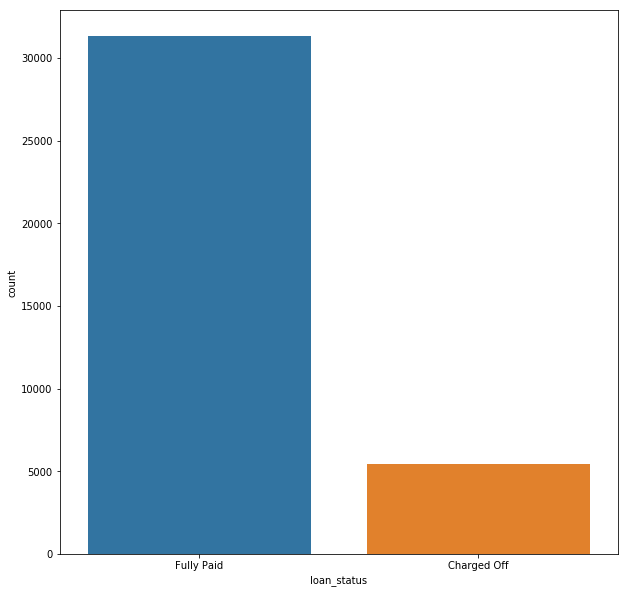

In [20]:
#Counting number of loan application was fully paid vs charged off
plt.figure(figsize=(10,10))
sns.countplot(x="loan_status", data=loan_df)
plt.show()

<Figure size 1080x720 with 0 Axes>

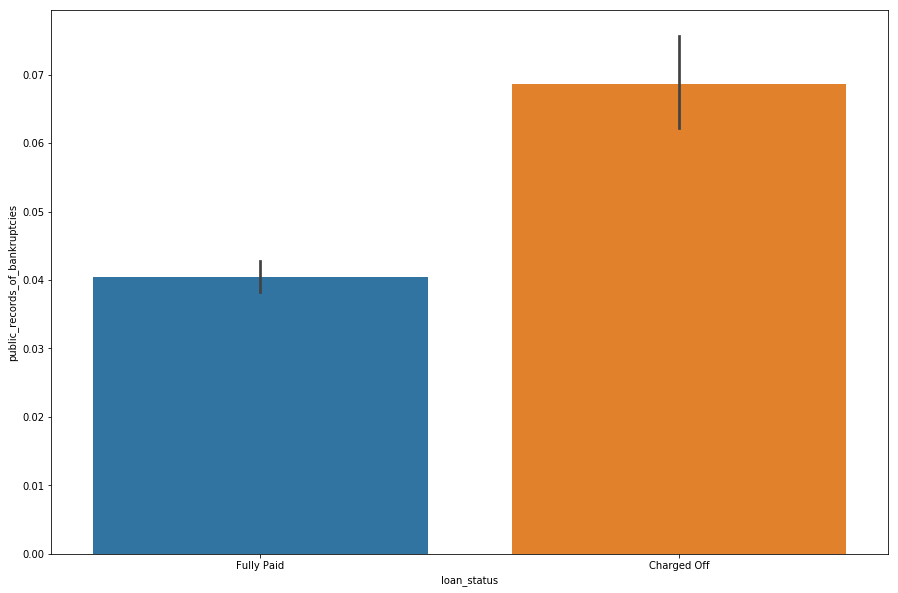

In [21]:
#Percentage of public records bankruptcies vs loan status(fully paid, charged off)
plt.figure(figsize=(15,10))
sns.barplot(x='loan_status',y='public_records_of_bankruptcies', data=loan_df)
plt.show()

<Figure size 1080x720 with 0 Axes>

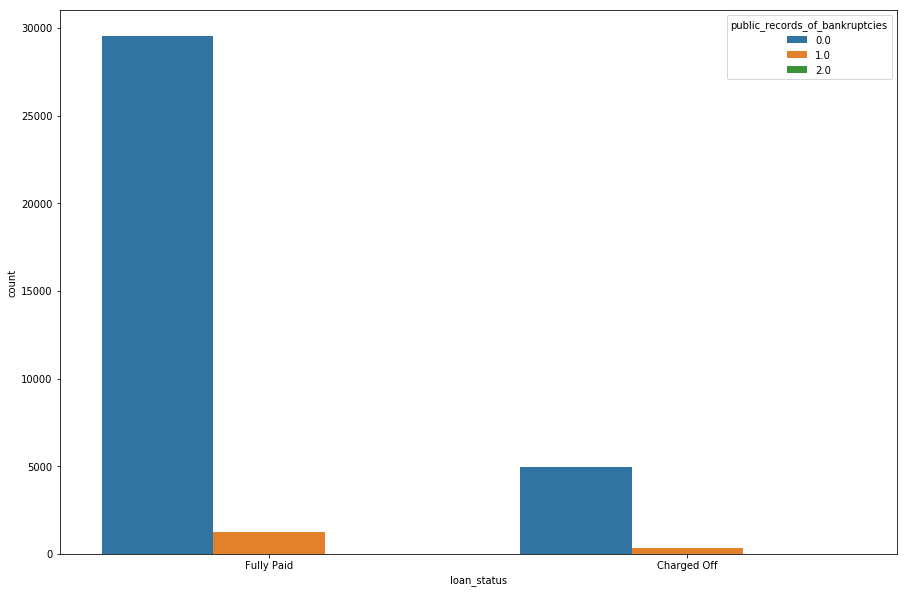

In [22]:
#Percentage of public records bankruptcies vs loan status(fully paid, charged off)
plt.figure(figsize=(15,10))
sns.countplot(x="loan_status", hue='public_records_of_bankruptcies', data=loan_df)
plt.show()

<Figure size 1080x720 with 0 Axes>

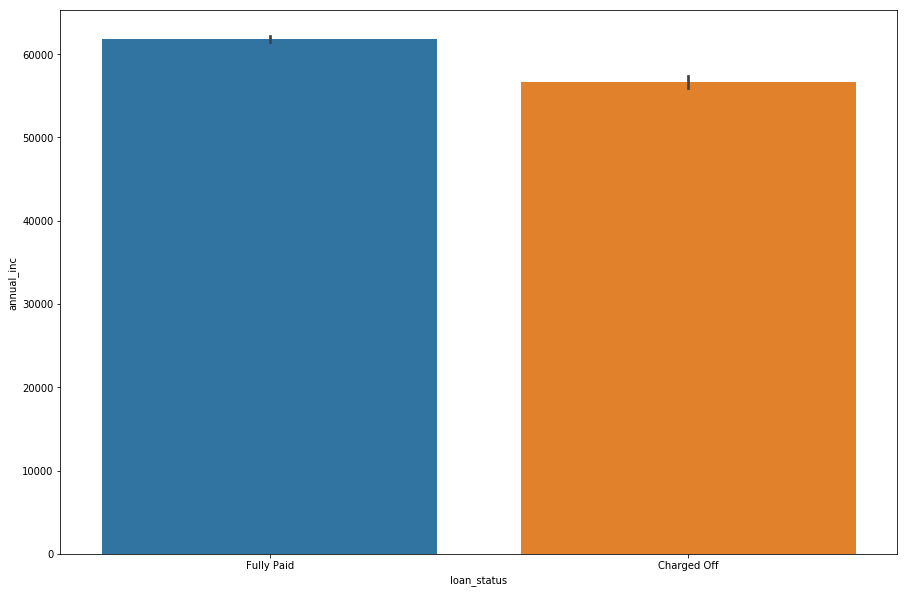

In [23]:
#Counting annual_inc vs loan status(fully paid, charged off)
plt.figure(figsize=(15,10))
sns.barplot(x='loan_status',y='annual_inc', data=loan_df)
plt.show()

<Figure size 720x720 with 0 Axes>

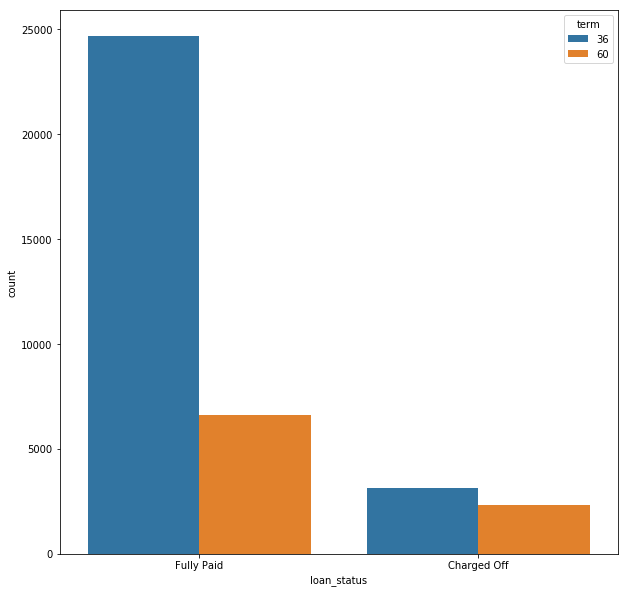

In [24]:
#Counting term vs loan status(fully paid, charged off)
plt.figure(figsize=(10,10))
sns.countplot(x="loan_status", hue='term', data=loan_df)
plt.show()

<Figure size 1080x720 with 0 Axes>

Text(0.5,0,'Loan Status')

Text(0,0.5,'Loan Amount')

Text(0.5,1,'Loan Amount vs Purpose')

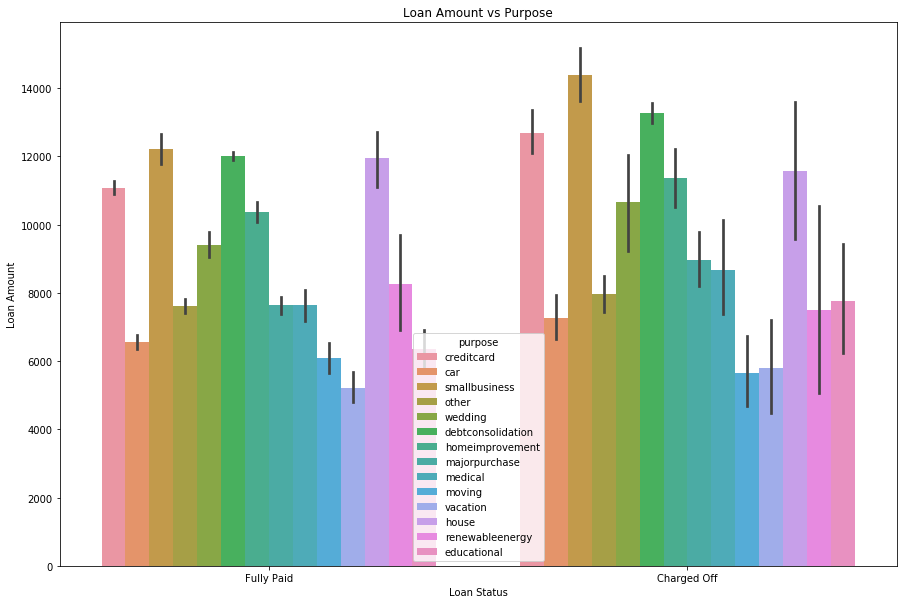

In [25]:
#Counting Purpose vs loan status(fully paid, charged off)
plt.figure(figsize=(15,10))
sns.barplot(x='loan_status',y='loan_amnt',hue='purpose',data=loan_df)
plt.xlabel("Loan Status")
plt.ylabel("Loan Amount")
plt.title("Loan Amount vs Purpose")
plt.show()

##### As per above snapshot, 'Credit Card', 'Small Business', 'Debt Consolidation' and 'Other' are the 4 major purpose for which Charged Off cases are high

<Figure size 1080x720 with 0 Axes>

Text(0.5,0,'Employees Count ')

Text(0,0.5,'Employment Length')

Text(0.5,1,'Emp Length vs Default relationship')

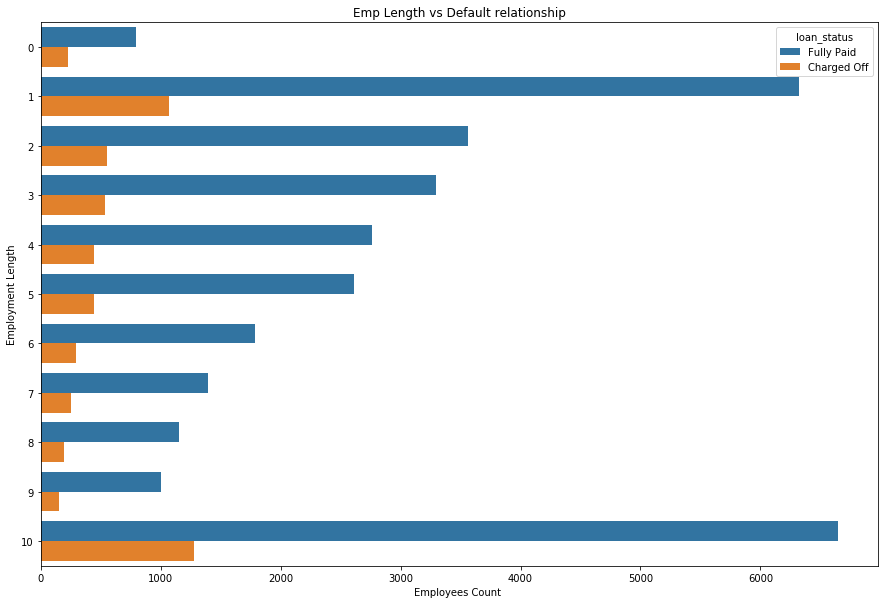

In [26]:
#Emp experience vs Employees count
plt.figure(figsize=(15,10))
sns.countplot(y='emp_length',hue='loan_status',data=loan_df)
plt.xlabel("Employees Count ")
plt.ylabel("Employment Length")
plt.title("Emp Length vs Default relationship")
plt.show()

##### As per above snapshot, we can infer that the employees with 0 to 5 years experience has higher charged of cases, then employees with 5 to 10 years or 10+ years.

In [27]:
# default rate
# Converting Loan status into numerical vlaue for correlation
loan_df['loan_status'] =loan_df['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)  
round(np.mean(loan_df['loan_status']), 2)

0.15

<Figure size 720x720 with 0 Axes>

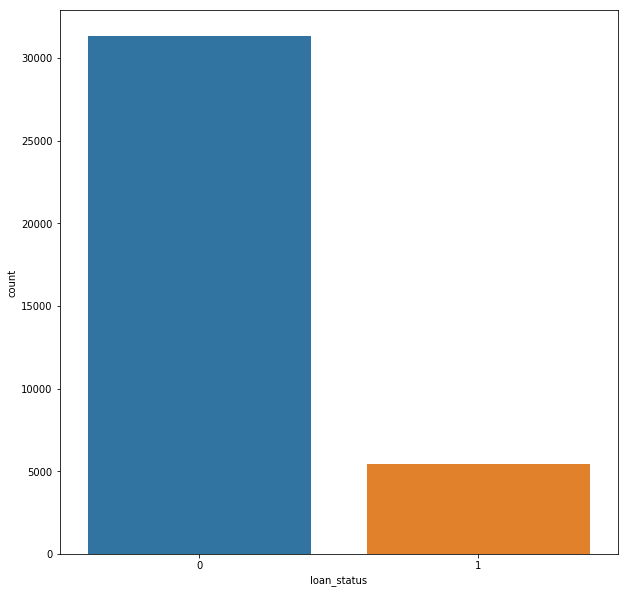

In [28]:
# Count of loan status
plt.figure(figsize=(10,10))
sns.countplot(x="loan_status", data=loan_df)
plt.show()

In the above snapshot, '0' is refered as "Fully Paid" and '1' is refered as "Charged Off"

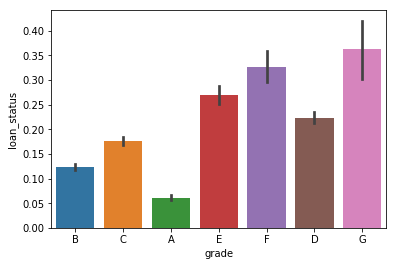

In [29]:
# plotting default rates across grade of the loan
sns.barplot(x='grade', y='loan_status', data=loan_df)
plt.show()

##### Clearly, as the grade of loan goes from A to G, the default rate increases. This is expected because the grade is decided by Lending Club based on the riskiness of the loan.

In [30]:
# lets define a function to plot loan_status across categorical variables
def plot_categorical(categorical_var):
    sns.barplot(x=categorical_var, y='loan_status', data=loan_df)
    plt.show()

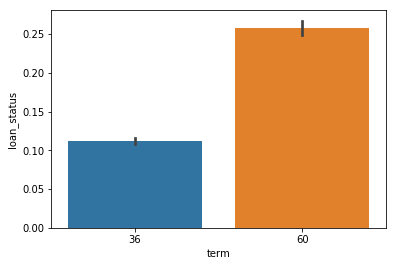

In [31]:
# term: 60 months loans default more than 36 months loans
plot_categorical('term')

Clearly, from the above snapshot, we can say that the loan with term 60 Months is having more risk for defaulter case.

<Figure size 2016x864 with 0 Axes>

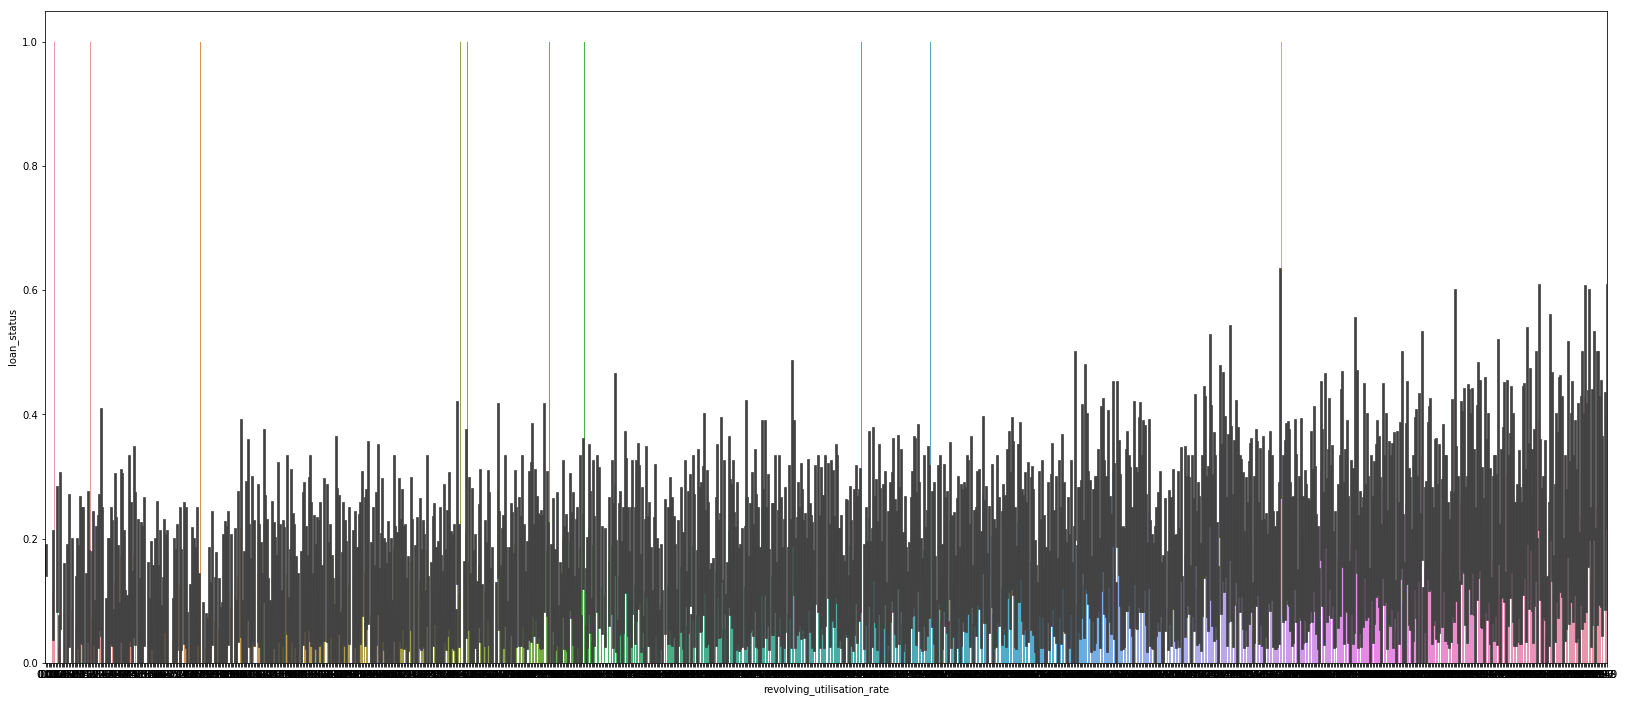

In [32]:
#revolving_utilisation_rate vs loan status
plt.figure(figsize=(28, 12))
plot_categorical('revolving_utilisation_rate')

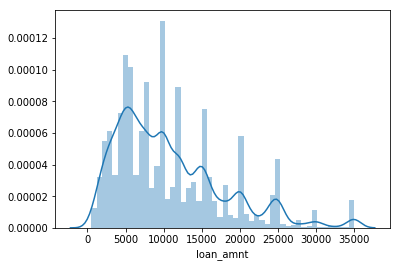

In [33]:
# loan amount: the median loan amount is around 10,000
sns.distplot(loan_df['loan_amnt'])
plt.show()

In [34]:
# binning loan amount
def loan_amount(n):
    if n < 5000:
        return 'low'
    elif n >=5000 and n < 15000:
        return 'medium'
    elif n >= 15000 and n < 25000:
        return 'high'
    else:
        return 'very high'
        
loan_df['loan_amnt'] = loan_df['loan_amnt'].apply(lambda x: loan_amount(x))

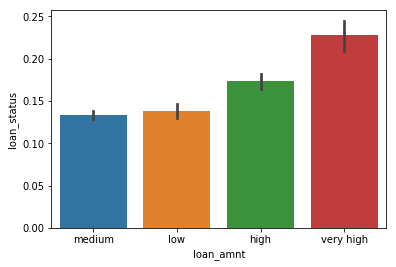

In [35]:
# let's compare the default rates across loan amount type
# higher the loan amount, higher the default rate
plot_categorical('loan_amnt')

##### From the above snapshots, we can say that if the loan amount is high, there is more chance of loan getting defaulted(Charged Off) 

<Figure size 2016x864 with 0 Axes>

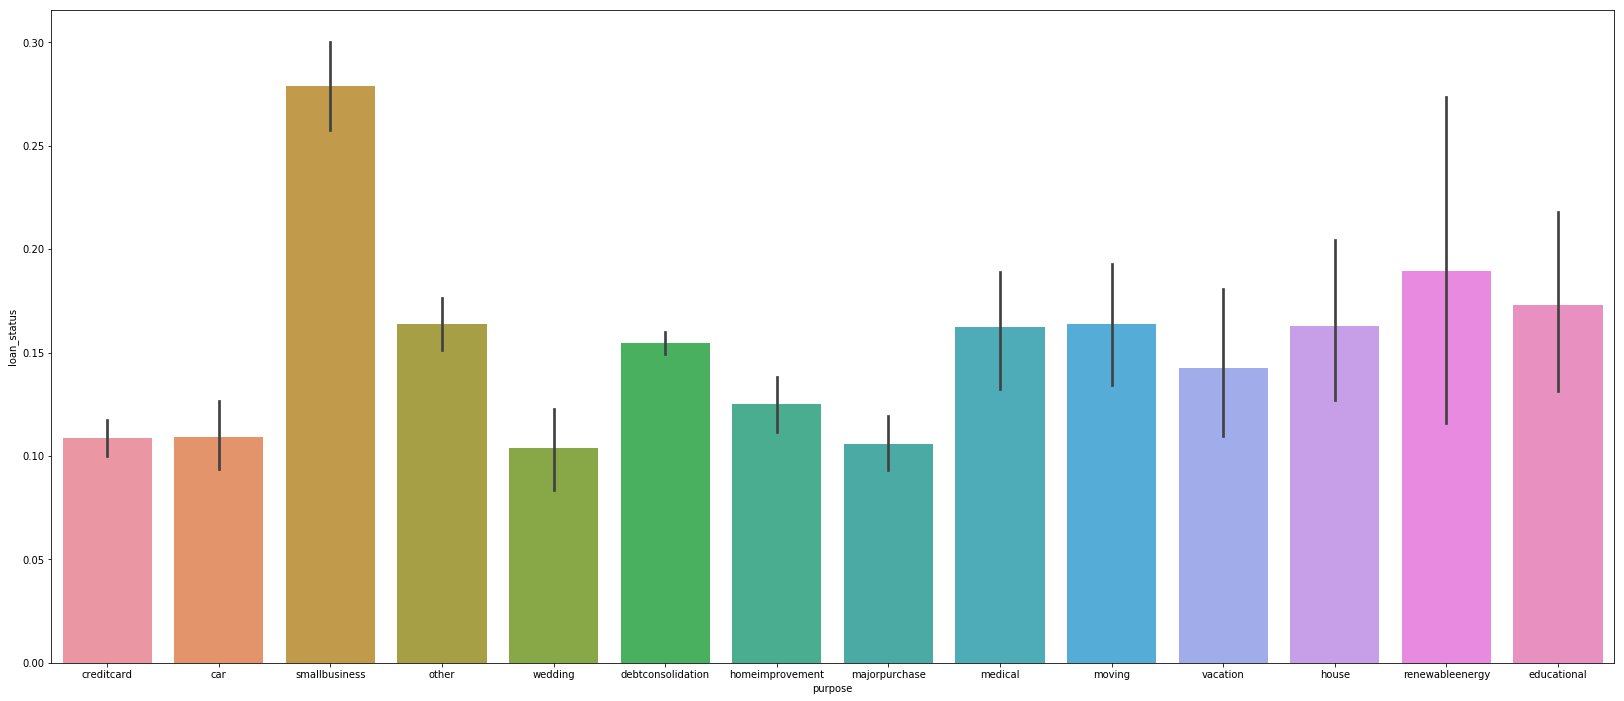

In [36]:
# purpose: small business loans defualt the most, then Credit Card, Data Consolidation, renewable energy and education
plt.figure(figsize=(28, 12))
plot_categorical('purpose')

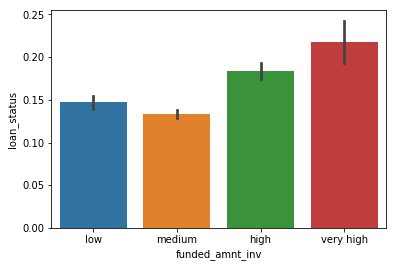

In [37]:
# let's also convert funded amount invested to bins
loan_df['funded_amnt_inv'] = loan_df['funded_amnt_inv'].apply(lambda x: loan_amount(x))

# funded amount invested
plot_categorical('funded_amnt_inv')

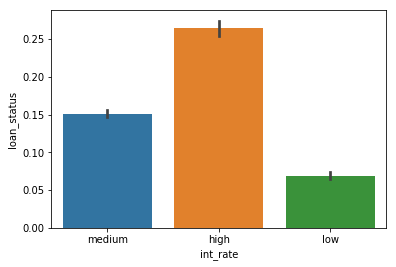

In [38]:
#lets also convert interest rate to low, medium, high
# binning loan amount
def int_rate(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=15:
        return 'medium'
    else:
        return 'high'
    
    
loan_df['int_rate'] = loan_df['int_rate'].apply(lambda x: int_rate(x))
# comparing default rates across rates of interest
# high interest rates default more, as expected
plot_categorical('int_rate')

##### From the above snapshot, we can infer that the loan amount with highest interest rate has maximum chance of getting charged off 

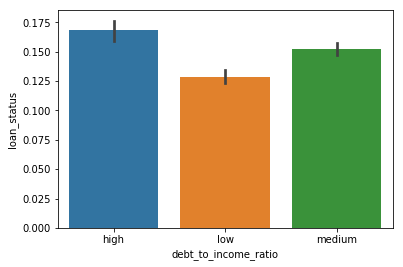

In [39]:
# debt to income ratio
def dti(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=20:
        return 'medium'
    else:
        return 'high'
    

loan_df['debt_to_income_ratio'] = loan_df['debt_to_income_ratio'].apply(lambda x: dti(x))
# comparing default rates across debt to income ratio
# high dti translates into higher default rates, as expected
plot_categorical('debt_to_income_ratio')

In [40]:
### So with Univariate analysis, we can say that the interest rate, loan amount, loan term, 
### experience(in years), purpose for which applicant is applying for loan, annual income plays 
### the major role for deciding if the applicant will be going to default the loan or not. So the bank should checking 
### these variables before taking the decisions on loan applications.

# Segmented Univariate Analysis

<Figure size 2160x432 with 0 Axes>

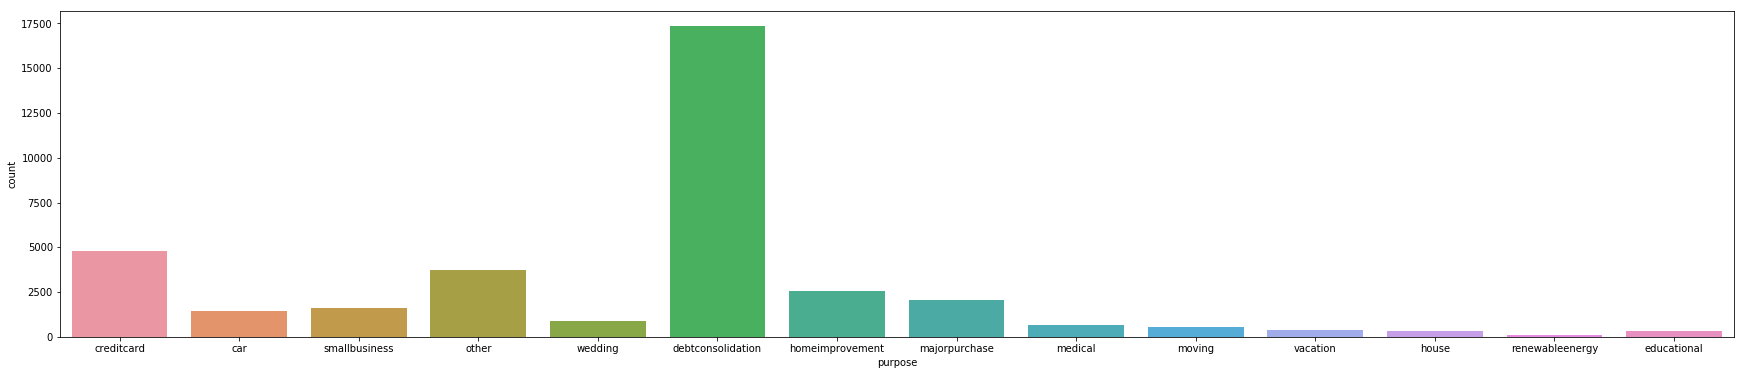

In [41]:
# lets first look at the number of loans for each type (purpose) of the loan
# most loans are debt consolidation (to repay otehr debts), then credit card, major purchase etc.
plt.figure(figsize=(30, 6))
sns.countplot(x='purpose', data=loan_df)
plt.show()

<Figure size 2160x432 with 0 Axes>

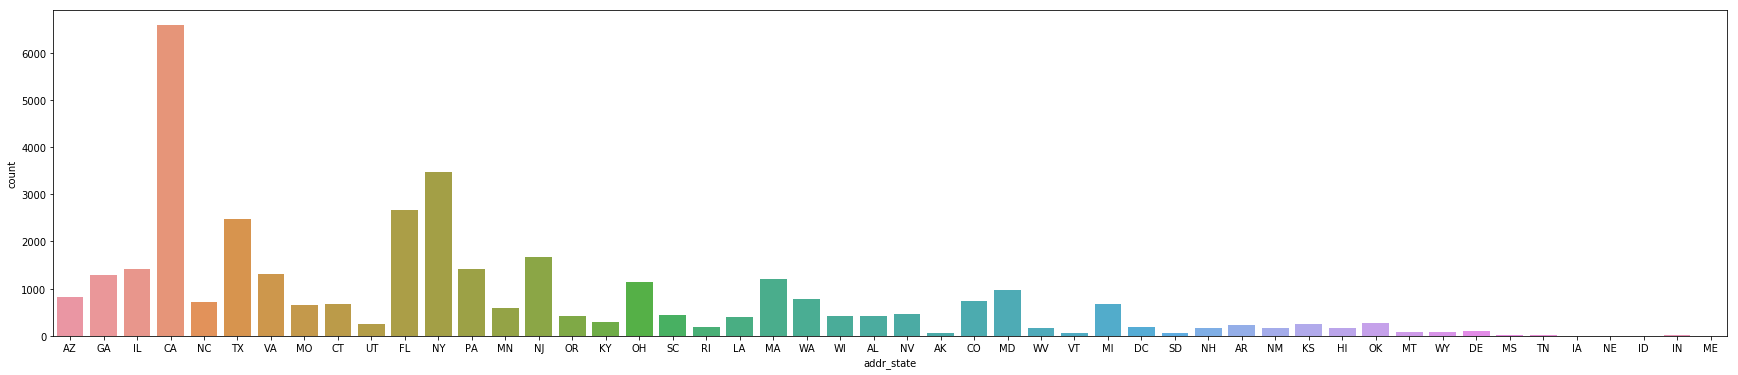

In [42]:
# lets look at the number of loans for every state where loan has been applied.
# Most of the charged off cases are getting registered in 'CA' i.e. California
plt.figure(figsize=(30, 6))
sns.countplot(x='addr_state', data=loan_df)
plt.show()

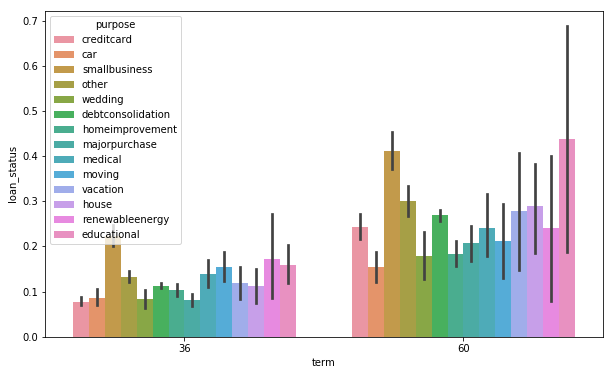

In [43]:
# lets write a function which takes a categorical variable and plots the default rate
# segmented by purpose 

def plot_segmented(cat_var):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=cat_var, y='loan_status', hue='purpose', data=loan_df)
    plt.show()

    
plot_segmented('term')

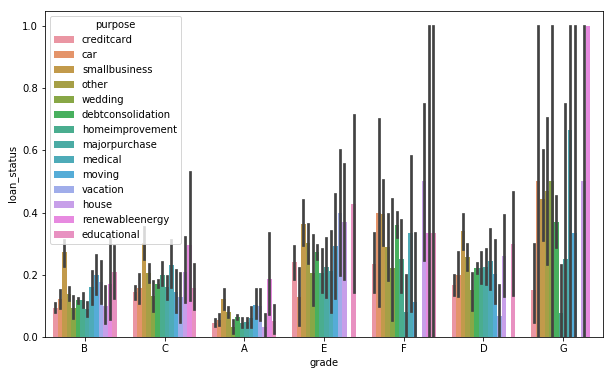

In [44]:
# grade of loan
plot_segmented('grade')

<Figure size 720x432 with 0 Axes>

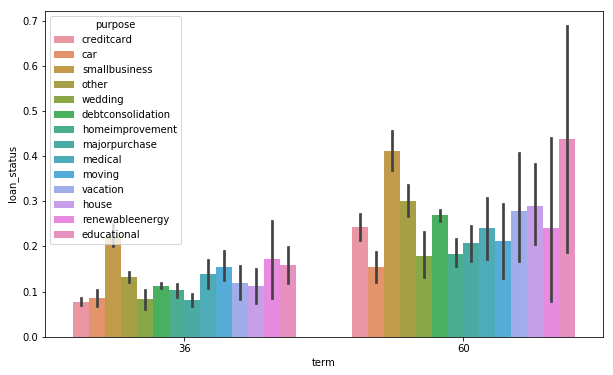

In [45]:
# let's now compare the default rates across two types of categorical variables
# purpose of loan (constant) and another categorical variable (which changes)

plt.figure(figsize=[10, 6])
sns.barplot(x='term', y="loan_status", hue='purpose', data=loan_df)
plt.show()

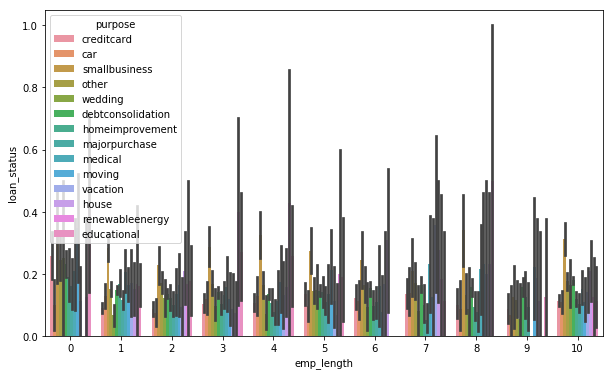

In [46]:

# emp_length
plot_segmented('emp_length')

In [47]:
### We have now compared the default rates across various variables, and some of the important predictors are purpose of the loan, interest rate, annual income, grade etc.

### In the credit industry, one of the most important factors affecting default is the purpose of the loan - home loans perform differently than credit cards, credit cards are very different from debt condolidation loans etc.


# Bivariate Analysis

<Figure size 2160x864 with 0 Axes>

Text(0.5,1,'Purpose of Loan vs Loan Amount')

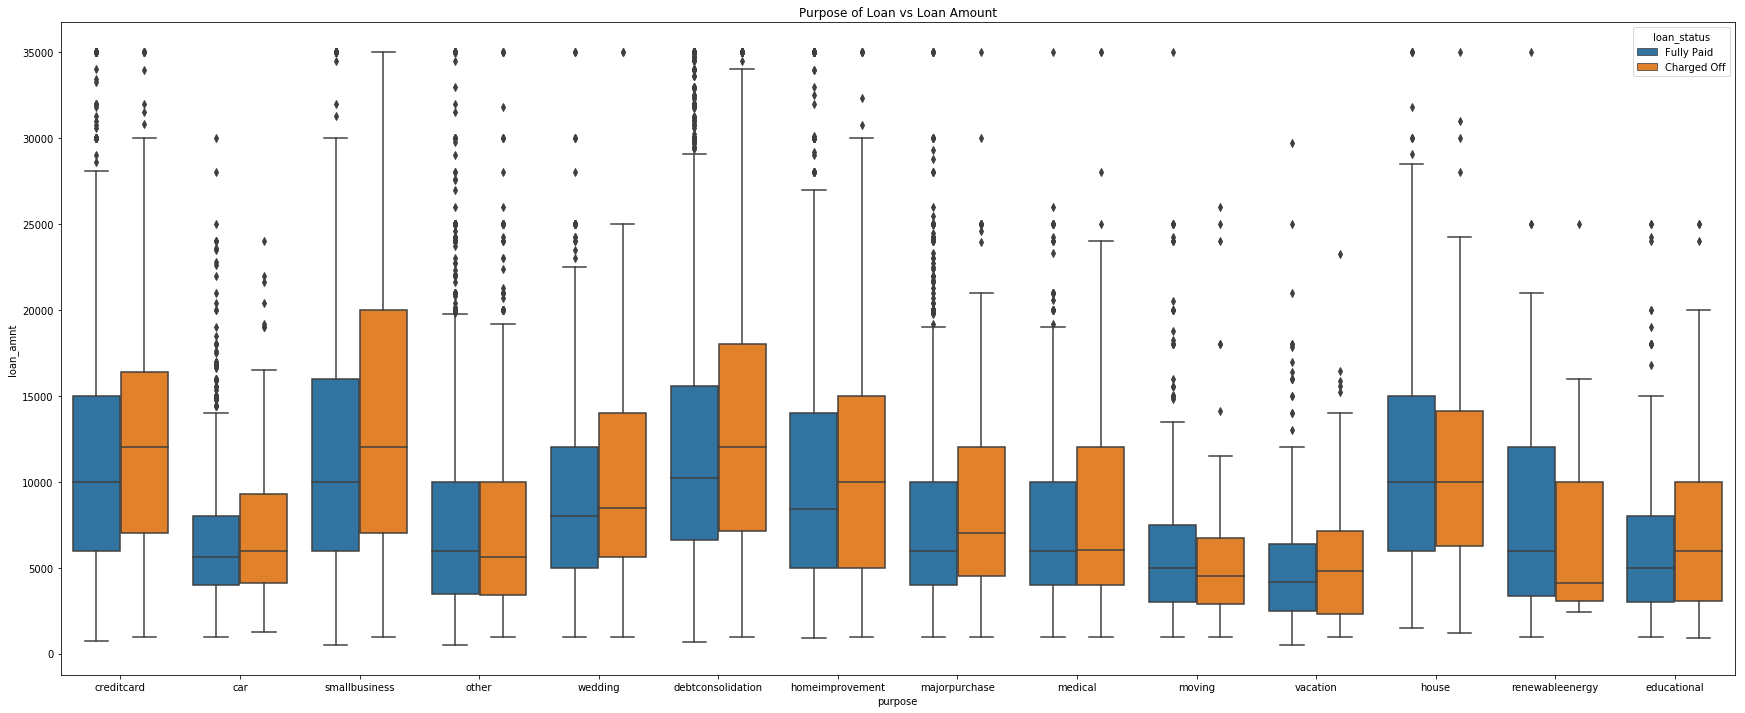

In [48]:
plt.figure(figsize=(30,12))
sns.boxplot(data =loan_df1, x='purpose', y='loan_amnt', hue ='loan_status')
plt.title('Purpose of Loan vs Loan Amount')
plt.show()
#loan_df1['loan_amnt']

#### Insights: Applicants who has taken the Loan for 'small business' has the highest probabilty of charge off of 14%. So bank should take extra caution like take some asset or guarentee while approving the loan for purpose of 'small business'

<Figure size 1152x864 with 0 Axes>

Text(0.5,1,'Term vs Loan Amount')

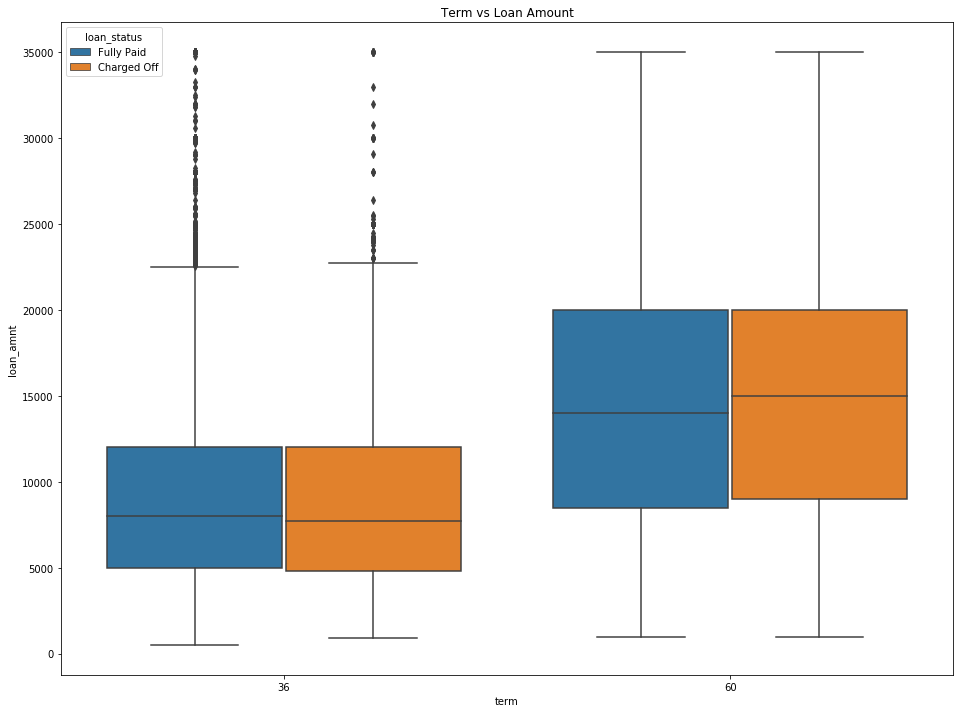

In [49]:
# Loan Amount vs term
plt.figure(figsize=(16,12))
sns.boxplot(data =loan_df1, x='term', y='loan_amnt', hue ='loan_status')
plt.title('Term vs Loan Amount')
plt.show()

<Figure size 1152x864 with 0 Axes>

Text(0.5,1,'Grade vs Loan Amount')

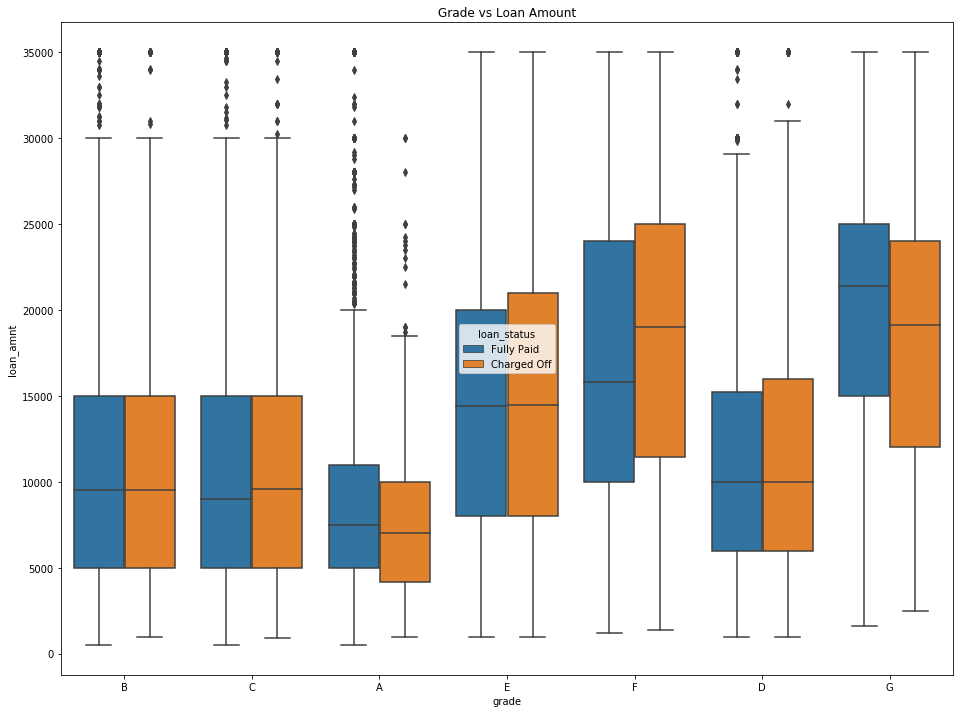

In [50]:
# Loan amount vs Grade
plt.figure(figsize=(16,12))
sns.boxplot(data =loan_df1, x='grade', y='loan_amnt', hue ='loan_status')
plt.title('Grade vs Loan Amount')
plt.show()

<Figure size 1152x864 with 0 Axes>

Text(0.5,1,'Applicant Experience(in years) vs Loan Amount')

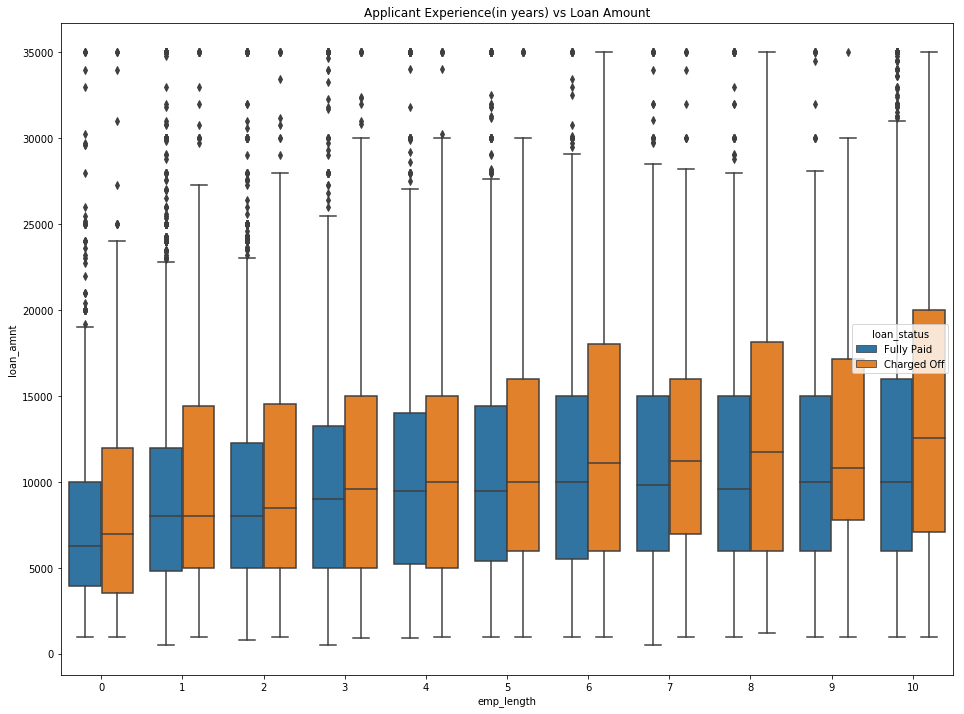

In [51]:
# Loan amunt vs employee experience
plt.figure(figsize=(16,12))
sns.boxplot(data =loan_df1, x='emp_length', y='loan_amnt', hue ='loan_status')
plt.title('Applicant Experience(in years) vs Loan Amount')
plt.show()

<Figure size 1152x864 with 0 Axes>

Text(0.5,1,'Public Record of Bankruptcies vs Loan Amount')

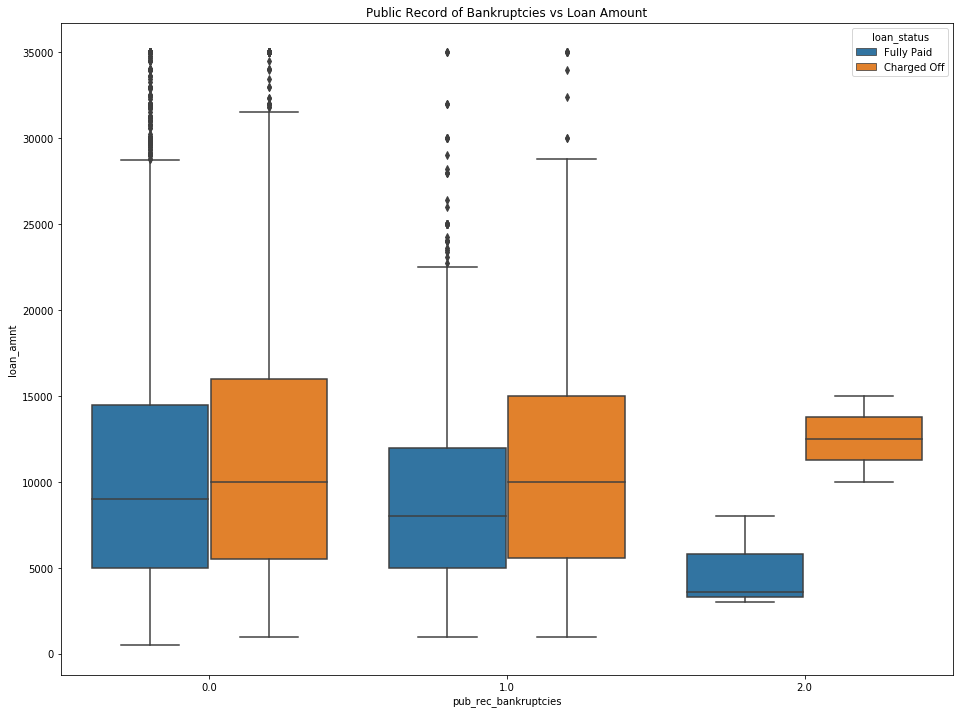

In [52]:
#Loan amount vs Public record of bankruptcies
plt.figure(figsize=(16,12))
sns.boxplot(data =loan_df1, x='pub_rec_bankruptcies', y='loan_amnt', hue ='loan_status')
plt.title('Public Record of Bankruptcies vs Loan Amount')
plt.show()


<Figure size 1152x864 with 0 Axes>

Text(0.5,1,'State vs Loan Amount')

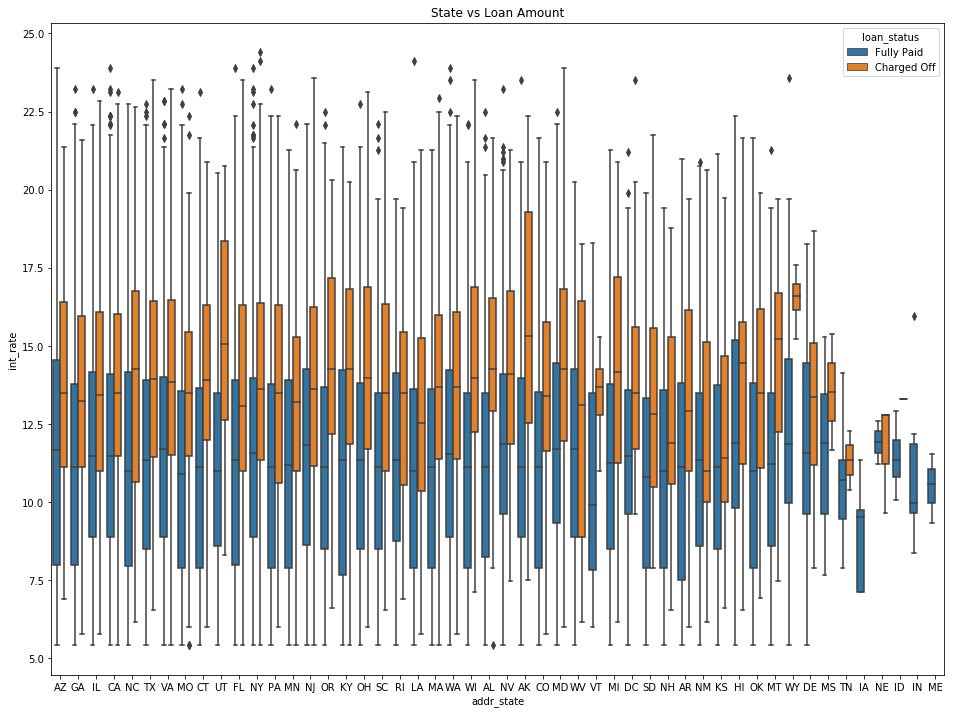

In [53]:
# Interest rate vs state Area
plt.figure(figsize=(16,12))
sns.boxplot(data =loan_df1, x='addr_state', y='int_rate', hue ='loan_status')
plt.title('State vs Loan Amount')
plt.show()

#### Insights: There are multiple States/Provinces where interest rate is high and it is having high probability of getting charged off.